In [36]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Classifier

### Make the dataset

In [5]:
X, y = make_blobs(n_samples=40, random_state=42, n_features=2, cluster_std=3, centers=3)

<AxesSubplot:xlabel='x1', ylabel='x2'>

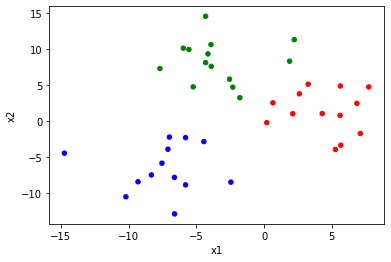

In [6]:
df = pd.DataFrame(X, columns=['x1', 'x2'])

df['y'] = y

col = df['y'].map({1:'r', 2:'b', 0:'g'})

df.plot(kind='scatter', x='x1', y='x2', c=col)

### Define the class

In [65]:
class knn_c():
    def __init__(self, k):
        self.k = k
        self.X = []
        self.y = []
        
    # distance function is just euclidean distance without the square root since it doesn't change the order of the closest points.
    def dist(self, x1, x2):
        total = 0
        for i, j in zip(x1, x2):
            total += pow(i-j, 2)
        return total
            
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, array):
        result_array = []
        
        for x in array:
            distance_array = []
            for point, result in zip(self.X, self.y):
                distance_array.append((self.dist(x, point), result))
            result_array.append(Counter([i[1] for i in sorted(distance_array)][:self.k]).most_common(1)[0][0])
            
        return result_array

In [67]:
model = knn_c(10)

model.fit(X, y)

model.predict([[-1], [0], [1]])

[-37.250852403722654, 14.590940233448936, 98.47586072973922]

# Regressor

### Make the dataset

In [38]:
X, y = make_regression(n_samples=100, n_features=1, random_state=4, noise=30, bias = 40)

<AxesSubplot:xlabel='X', ylabel='y'>

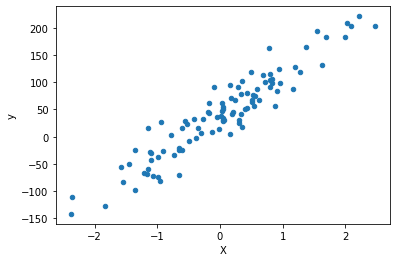

In [39]:
df = pd.DataFrame(X, columns=['X'])
df['y'] = y

df.plot(x='X', y='y', kind='scatter')

### Define the class

In [71]:
class knn_r():
    def __init__(self, k):
        self.k = k
        self.X = []
        self.y = []
        
    # distance function is just euclidean distance without the square root since it doesn't change the order of the closest points.
    def dist(self, x1, x2):
        total = 0
        for i, j in zip(x1, x2):
            total += pow(i-j, 2)
        return total
            
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, array):
        result_array = []
        
        for x in array:
            distance_array = []
            for point, result in zip(self.X, self.y):
                distance_array.append((self.dist(x, point), result))
            result_array.append(np.array([i[1] for i in sorted(distance_array)[:self.k]]).mean())
            
        return result_array

Prediction [-37.250852403722654, 14.590940233448936, 98.47586072973922]


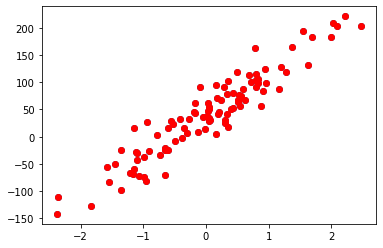

In [75]:
# k = 1

model = knn_r(1)

model.fit(X, y)

array = [[-1], [0], [1]]

print('Prediction', model.predict(array))

plt.scatter(X, y)
plt.scatter(X, model.predict(X), color='r')

Prediction [-55.513030355201664, 26.063065363808043, 111.71809151231545]


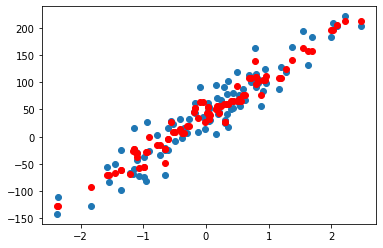

In [76]:
# k = 2

model = knn_r(2)

model.fit(X, y)

array = [[-1], [0], [1]]

print('Prediction', model.predict(array))

plt.scatter(X, y)
plt.scatter(X, model.predict(X), color='r')